In [1]:
# Creating a quantum circuit which adds
import qiskit as qs

In [2]:
def get_input_q_circuit(c_input_1, c_input_2):
    input_q_circuit = qs.QuantumCircuit(2, name="input_q_circuit")
    if c_input_1 == 1:
        input_q_circuit.x(0)
    if c_input_2 == 1:
        input_q_circuit.x(1)

    print(input_q_circuit.draw())
    return input_q_circuit.to_instruction()

In [3]:
def get_adder_q_circuit():
    adder_q_circuit = qs.QuantumCircuit(4, name="adder_q_circuit")
    adder_q_circuit.cx(0, 2)
    adder_q_circuit.cx(1, 2)
    adder_q_circuit.ccx(0, 1, 3) # Tiffoli gate or AND gate
    
    print(adder_q_circuit.draw())
    return adder_q_circuit.to_instruction()

In [4]:
def get_measurement_q_circuit(num_of_qubits): # qubit_indices is an array of qubits to observe
    measurement_q_circuit = qs.QuantumCircuit(num_of_qubits, num_of_qubits, name="output_q_circuit")
    for qubit_index in range(num_of_qubits):
        measurement_q_circuit.measure(qubit_index, qubit_index)
        
    print(measurement_q_circuit.draw())
    return measurement_q_circuit.to_instruction()

In [6]:
c_input_1 = 0 # 1 or 0
c_input_2 = 0 # 1 or 0

half_adder_circuit = qs.QuantumCircuit(4, 2)
print("input_q_circuit: ")
input_q_circuit = get_input_q_circuit(c_input_1, c_input_2)
print("adder_q_circuit: ")
adder_q_circuit = get_adder_q_circuit()
print("measurement_q_circuit: ")
measurement_q_circuit = get_measurement_q_circuit(2)

input_q_circuit: 
     
q_0: 
     
q_1: 
     
adder_q_circuit: 
                    
q_0: ──■─────────■──
       │         │  
q_1: ──┼────■────■──
     ┌─┴─┐┌─┴─┐  │  
q_2: ┤ X ├┤ X ├──┼──
     └───┘└───┘┌─┴─┐
q_3: ──────────┤ X ├
               └───┘
measurement_q_circuit: 
     ┌─┐   
q_0: ┤M├───
     └╥┘┌─┐
q_1: ─╫─┤M├
      ║ └╥┘
c: 2/═╩══╩═
      0  1 


In [7]:
half_adder_circuit.append(input_q_circuit, [0, 1])
half_adder_circuit.append(adder_q_circuit, [0, 1, 2, 3])
half_adder_circuit.append(measurement_q_circuit, [2, 3], [0, 1])

In [8]:
half_adder_circuit.draw()

┌──────────────────┐┌──────────────────┐                     
q_0: ┤0                 ├┤0                 ├─────────────────────
     │  input_q_circuit ││                  │                     
q_1: ┤1                 ├┤1                 ├─────────────────────
     └──────────────────┘│  adder_q_circuit │┌───────────────────┐
q_2: ────────────────────┤2                 ├┤0                  ├
                         │                  ││                   │
q_3: ────────────────────┤3                 ├┤1                  ├
                         └──────────────────┘│  output_q_circuit │
c_0: ════════════════════════════════════════╡0                  ╞
                                             │                   │
c_1: ════════════════════════════════════════╡1                  ╞
                                             └───────────────────┘

In [9]:
q_simulator = qs.Aer.get_backend("qasm_simulator")

In [10]:
job_1 = qs.execute(half_adder_circuit, q_simulator, shots=8092)
result_1 = job_1.result()

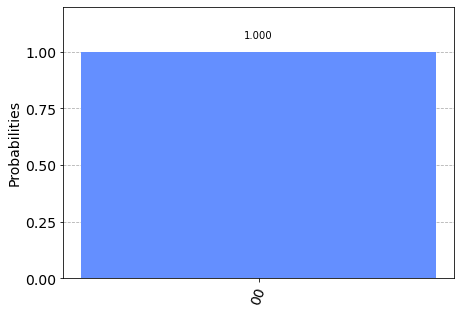

In [12]:
# currently it adds 2 1 bit numbers. Can be extended to 2 4 bit numbers (0 to 15) and output will have to be a 5 bit number. So total qubits required is 4 + 4 + 5 = 13 and 5 classical bits for the answer.
# another way can be extended is by having a loop which goes through 2 numbers bit by bit and calls the qc for addition. This will not require extra qubits.
qs.visualization.plot_histogram(result_1.get_counts())